# 1. Reading the Dataset and Importing Libraries

In [15]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read File Excel
data = pd.ExcelFile('BearingVibration_Dataset.xlsx')

data.parse(0).columns = ['Time','Bearing 1','Bearing 2','Bearing 3','Bearing 4']
Final_Dataset = pd.DataFrame(data.parse(0))
Final_Dataset

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659
...,...,...,...,...,...
977,2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
978,2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
979,2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817
980,2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786


# 2. Visualizing the Dataset

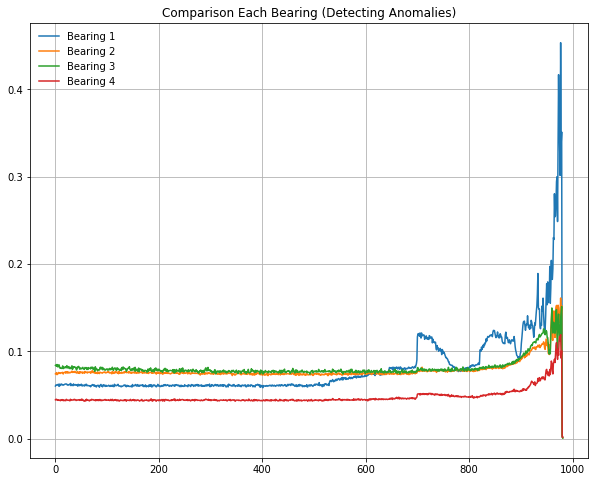

In [16]:
# Detecting Libraries
fig, ax = plt.subplots(figsize = (10,8))

# Explarotory Data Analysis
ax.plot(Final_Dataset['Bearing 1'])
ax.plot(Final_Dataset['Bearing 2'])
ax.plot(Final_Dataset['Bearing 3'])
ax.plot(Final_Dataset['Bearing 4'])
ax.set_title('Comparison Each Bearing (Detecting Anomalies)')
ax.grid(True)
ax.legend(['Bearing 1','Bearing 2','Bearing 3','Bearing 4'],loc = 'upper left', frameon = False)
plt.show()

# 3. Deploying DBSCAN Machine Learning

(870, 1000)

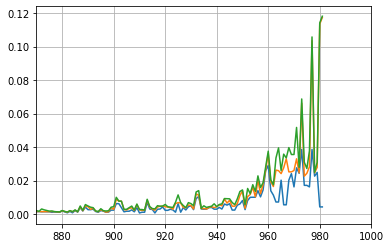

In [17]:
# Find the Optimum Epsilon Number
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs  = neigh.fit(Final_Dataset.iloc[:,1:4])
distances, indices = nbrs.kneighbors(Final_Dataset.iloc[:,1:4])

# Visualize the significant Curve 
plt.plot(distances[:,1])
plt.plot(distances[:,2])
plt.plot(distances[:,3])
plt.grid(True)
plt.xlim(870,1000)

*It seems the highest curve displayed at 0.01. Therefore, we are using 0.01 to deploy in this program*

In [45]:
# Using Eps = 0.01
# Implementing DBSCAN to detect outliers in this part
eps = 0.01
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = eps)
dbscan.fit(Final_Dataset.iloc[:,1:5])

# DBSCAN allocation
Final_Dataset["Labels"] = dbscan.labels_
Final_Dataset["Number"] = range(0,len(Final_Dataset))

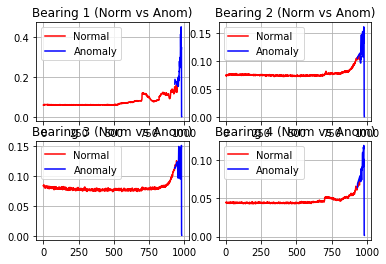

In [46]:
# Visualize the Anomaly vs Normal
plt.subplot(2,2,1)
plt.plot(Final_Dataset.loc[Final_Dataset['Labels']==0, "Bearing 1"], color = 'red')
plt.plot(Final_Dataset.loc[Final_Dataset['Labels']==-1, "Bearing 1"],color = 'blue')
plt.legend(['Normal','Anomaly'],loc = 'best')
plt.title('Bearing 1 (Norm vs Anom)')
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(Final_Dataset.loc[Final_Dataset['Labels']==0, "Bearing 2"], color = 'red')
plt.plot(Final_Dataset.loc[Final_Dataset['Labels']==-1, "Bearing 2"],color = 'blue')
plt.legend(['Normal','Anomaly'],loc = 'best')
plt.title('Bearing 2 (Norm vs Anom)')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(Final_Dataset.loc[Final_Dataset['Labels']==0, "Bearing 3"], color = 'red')
plt.plot(Final_Dataset.loc[Final_Dataset['Labels']==-1, "Bearing 3"],color = 'blue')
plt.legend(['Normal','Anomaly'],loc = 'best')
plt.title('Bearing 3 (Norm vs Anom)')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(Final_Dataset.loc[Final_Dataset['Labels']==0, "Bearing 4"], color = 'red')
plt.plot(Final_Dataset.loc[Final_Dataset['Labels']==-1,"Bearing 4"],color = 'blue')
plt.legend(['Normal','Anomaly'],loc = 'best')
plt.title('Bearing 4 (Norm vs Anom)')
plt.grid(True)
plt.show()

# 4. Evaluate the DBSCAN Model
We are using the Statistical Anomaly Detection based on Mean and Standard Deviation Analysis. 
The Standard Deviation able to take out the Outlier from these information, we are using **2 * Standard Deviation** as a highest deviation in this dataset. 

In [47]:
# Evaluate the Model, we are using the Statistical Anomaly Detection
Evaluate_Dataset = data.parse(0)

# Allocate Mean + 2 * Std as the Highest Deviation, and also Mean - 2 * Std as the Lowest Deviation
maximum = (Evaluate_Dataset.mean() + (Evaluate_Dataset.std() * 2))
minimum = (Evaluate_Dataset.mean() - (Evaluate_Dataset.std() * 2))

In [20]:
# Define the Label
Label_1 = []
Label_2 = []
Label_3 = []
Label_4 = []

# Append the Label
for j in range(0,4):
    for i in range(0, len(Final_Dataset)):
        if(j==0):
            if(Final_Dataset.iloc[i,1]<maximum[j] and Final_Dataset.iloc[i,1]>minimum[j]):
                Label_1.append(0)
            else:
                Label_1.append(-1)
        elif(j==1):
            if(Final_Dataset.iloc[i,2]<maximum[j] and Final_Dataset.iloc[i,2]>minimum[j]):
                Label_2.append(0)
            else:
                Label_2.append(-1)
        elif(j==2):
            if(Final_Dataset.iloc[i,3]<maximum[j] and Final_Dataset.iloc[i,3]>minimum[j]):
                Label_3.append(0)
            else:
                Label_3.append(-1)    
        else:
            if(Final_Dataset.iloc[i,4]<maximum[j] and Final_Dataset.iloc[i,4]>minimum[j]):
                Label_4.append(0)
            else:
                Label_4.append(-1)

# Merge the Label Together
Labelled = pd.concat([pd.DataFrame(Label_1), pd.DataFrame(Label_2), pd.DataFrame(Label_3), pd.DataFrame(Label_4)],axis = 1)
take_smaller = lambda s1, s2: s1 if s1.sum() > s2.sum() else s2
Col_Label = Labelled.iloc[:,0].combine(Labelled.iloc[:,1], take_smaller).combine(Labelled.iloc[:,2], take_smaller).combine(Labelled.iloc[:,3], take_smaller)

In [51]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Print Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(Final_Dataset["Labels"], Col_Label))

# The Evaluation Parameters
print("The Accuracy is : ", accuracy_score(Final_Dataset["Labels"], Col_Label))
print("The Precision Score is : ", precision_score(Final_Dataset["Labels"], Col_Label, average = 'macro'))
print("The Recall Score is : ", recall_score(Final_Dataset["Labels"], Col_Label, average = 'macro'))
print("The F1 Score is : ", f1_score(Final_Dataset["Labels"], Col_Label, average = 'macro'))

Confusion Matrix
[[ 24  10]
 [  0 948]]
The Accuracy is :  0.9898167006109979
The Precision Score is :  0.9947807933194155
The Recall Score is :  0.8529411764705883
The Recall Score is :  0.9111698085899338


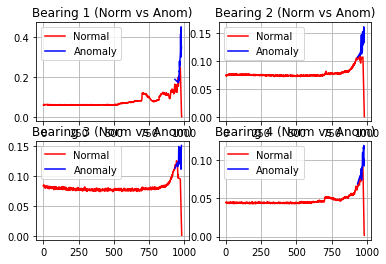

In [61]:
# Combine the column 
New_Evaluate = pd.concat([Evaluate_Dataset, Col_Label], axis = 1)
New_Evaluate.rename(columns={0:'Labels'}, inplace = True)


# Visualize the Anomaly vs Normal
plt.subplot(2,2,1)
plt.plot(New_Evaluate.loc[New_Evaluate['Labels']==0, "Bearing 1"], color = 'red')
plt.plot(New_Evaluate.loc[New_Evaluate['Labels']==-1, "Bearing 1"],color = 'blue')
plt.legend(['Normal','Anomaly'],loc = 'best')
plt.title('Bearing 1 (Norm vs Anom)')
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(New_Evaluate.loc[New_Evaluate['Labels']==0, "Bearing 2"], color = 'red')
plt.plot(New_Evaluate.loc[New_Evaluate['Labels']==-1, "Bearing 2"],color = 'blue')
plt.legend(['Normal','Anomaly'],loc = 'best')
plt.title('Bearing 2 (Norm vs Anom)')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(New_Evaluate.loc[New_Evaluate['Labels']==0, "Bearing 3"], color = 'red')
plt.plot(New_Evaluate.loc[New_Evaluate['Labels']==-1, "Bearing 3"],color = 'blue')
plt.legend(['Normal','Anomaly'],loc = 'best')
plt.title('Bearing 3 (Norm vs Anom)')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(New_Evaluate.loc[New_Evaluate['Labels']==0, "Bearing 4"], color = 'red')
plt.plot(New_Evaluate.loc[New_Evaluate['Labels']==-1,"Bearing 4"],color = 'blue')
plt.legend(['Normal','Anomaly'],loc = 'best')
plt.title('Bearing 4 (Norm vs Anom)')
plt.grid(True)
plt.show()